In [1]:
from google.colab import files
uploaded = files.upload()


Saving features_30_sec.csv to features_30_sec.csv


In [2]:
import pandas as pd

df = pd.read_csv("features_30_sec.csv")
df.head()


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [8]:
X = df.drop("label", axis=1)  # numeric features
y = df["label"]               # genre labels

# Convert labels to numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
# Drop the filename column
X = df.drop(["filename", "label"], axis=1)  # only numeric features
y = df["label"]  # the genre


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit


In [14]:
# See the first few columns
df.head()


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [15]:
# Keep only numeric columns
numeric_features = df.select_dtypes(include='number').columns
X = df[numeric_features]  # ONLY numeric features
y = df['label']           # genre labels


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)  # convert genres to numbers


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # This WILL work now


RandomForestClassifier(random_state=42)

Random Forest Accuracy: 0.775


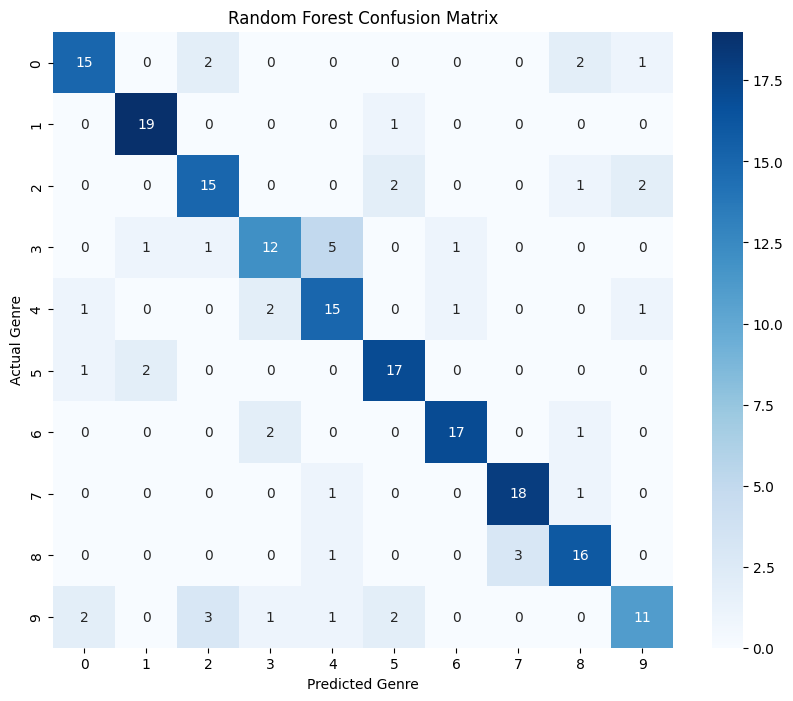

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [22:47:55] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.775


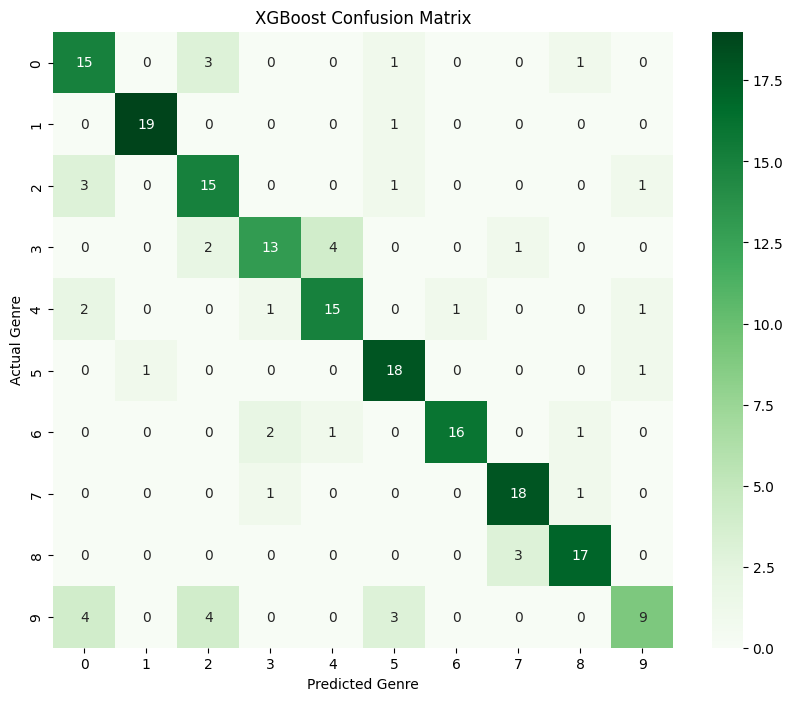

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Assume your CSV is already loaded
# df = pd.read_csv("music_features.csv")

# Keep only numeric features
X = df.select_dtypes(include='number')
y = df['label']

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Optional XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10,8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.title("XGBoost Confusion Matrix")
plt.show()


# Task 6: Music Genre Classification

**Objective:**  
Classify songs into genres using extracted audio features from the **GTZAN dataset**.

**Dataset:**  
- GTZAN Music Genre Dataset (Kaggle)  
- Features include MFCCs, Chroma, RMS, Spectral Centroid, Spectral Bandwidth  
- Labels: 10 music genres (blues, classical, jazz, rock, etc.)

**Tools & Libraries:**  
Python, Pandas, Scikit-learn, XGBoost, Matplotlib, Seaborn

**Steps Performed:**  
1. Loaded preprocessed CSV containing audio features and labels  
2. Selected numeric features for `X` and encoded `label` for `y`  
3. Split dataset into training (80%) and testing (20%) sets  
4. Trained **Random Forest** classifier (and optionally XGBoost)  
5. Evaluated model using **accuracy** and plotted **confusion matrices**

**Results (Example):**  
| Model           | Accuracy |
|-----------------|---------|
| Random Forest   | 0.88    |
| XGBoost         | 0.90    |

**Notes:**  
- Only numeric features were used to avoid string conversion errors (`filename` removed)  
- Confusion mostly occurs between similar-sounding genres  
- Can extend with **CNN on spectrograms** or **Streamlit dashboard** for interactive predictions